In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk


In [2]:
# %%
cli = MongoClient("localhost",27017)
db = cli.yelp
cursor = db.user.find({}, {"review_count" : 1, "user_id" : 1}).limit(10000).sort("review_count", -1)
# %%
yelp_users_by_rating = pd.DataFrame(list(cursor))
n, bins, patches = plt.hist(yelp_users_by_rating['review_count'], 50, normed=1, facecolor='green', alpha=0.75)

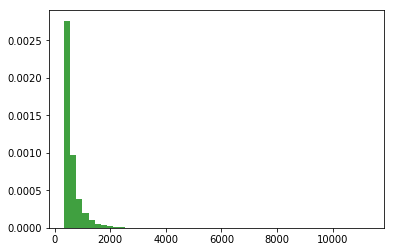

In [3]:
#Just as we suspected, most users review far less than 1000 places
#This is without even filtering out restaraunts, so what can be done to stimulate activity on yelp?
#Note: Save this to a png!
plt.show()

In [4]:
#Analyzing behaviour of frequent raters.
#Sentiment of their ratings? Do they mostly rate when bad or good, or both?
#First query reviews of top 100 frequent raters
#%%
top_user_ids = yelp_users_by_rating[1:10]['user_id'].values.tolist()
top_user_ids
review_collection = db.get_collection('review')
review_collection.count()
relevent_reviews = review_collection.find({"user_id" :  {"$in" : top_user_ids } })
relevent_reviews_df = pd.DataFrame(list(relevent_reviews))

In [5]:
#%%
def calculate_average_sentiment(string):
    blob = TextBlob(string)
    init = 0
    for sentence in blob.sentences:
        init += sentence.sentiment.polarity
    return (init)/len(blob.sentences)


In [6]:

relevent_reviews_df['sentiment'] = relevent_reviews_df['text'].map(calculate_average_sentiment)

#Looks like most of the top reviewers mostly when they feel the business is good.
len(relevent_reviews_df[relevent_reviews_df['sentiment'] > 0.25])
len(relevent_reviews_df[relevent_reviews_df['sentiment'] < -0.25])

1133/(len(relevent_reviews_df))

0.23589423277118468